In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
customers = pd.read_csv(r"C:\Users\MEGHANA\Downloads\Customers.csv")

In [15]:
products = pd.read_csv(r"C:\Users\MEGHANA\Downloads\Products.csv")

In [16]:
transactions = pd.read_csv(r"C:\Users\MEGHANA\Downloads\Transactions.csv")

In [13]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [17]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [18]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [33]:
merged_df = pd.merge(pd.merge(transactions, customers, on='CustomerID', how='left'), products, on='ProductID', how='left')
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Year,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [34]:
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
Year               0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [35]:
print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

              Year     Price_y  
count  1000.000000  1000.00000  
mean   2023.996000   272.55407  
min    2023.000000    16.08000  
25%    2024.000000   147.95000  
50%    2024.000000   299.93000  
75%    2024.000000   404.40000  
max    2024.000000   497.76000  
std       0.

In [36]:
print("\nUnique Counts:")
print(f"Unique Customers: {merged_df['CustomerID'].nunique()}")
print(f"Unique Products: {merged_df['ProductID'].nunique()}")
print(f"Unique Transactions: {merged_df['TransactionID'].nunique()}")


Unique Counts:
Unique Customers: 199
Unique Products: 100
Unique Transactions: 1000


In [37]:
print("\nDuplicate Rows:")
print(merged_df.duplicated().sum())


Duplicate Rows:
0


In [38]:
print("\nValue Counts for Categorical Columns:")
print("Region Distribution:")
print(merged_df['Region'].value_counts())
print("\nCategory Distribution:")
print(merged_df['Category'].value_counts())


Value Counts for Categorical Columns:
Region Distribution:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

Category Distribution:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [40]:
# Filter only numeric columns
numeric_columns = merged_df.select_dtypes(include=['number'])

# Compute the correlation matrix
print("\nCorrelation Matrix:")
print(numeric_columns.corr())



Correlation Matrix:
            Quantity  TotalValue   Price_x      Year   Price_y
Quantity    1.000000    0.609972 -0.009378 -0.026258 -0.009378
TotalValue  0.609972    1.000000  0.722714 -0.032449  0.722714
Price_x    -0.009378    0.722714  1.000000 -0.017852  1.000000
Year       -0.026258   -0.032449 -0.017852  1.000000 -0.017852
Price_y    -0.009378    0.722714  1.000000 -0.017852  1.000000


In [41]:
print("\nTotal Sales per Region:")
region_sales = merged_df.groupby('Region')['TotalValue'].sum()
print(region_sales)


Total Sales per Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [42]:
print("\nTop 5 Most Purchased Products:")
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)


Top 5 Most Purchased Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


C:\Users\MEGHANA\AppData\Local\Temp\ipykernel_17520\498442890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Region', palette='viridis', order=merged_df['Region'].value_counts().index)


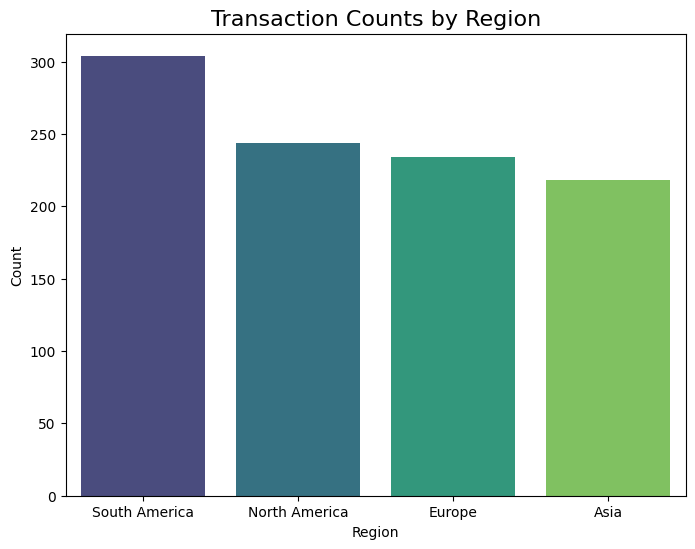

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Region', palette='viridis', order=merged_df['Region'].value_counts().index)
plt.title('Transaction Counts by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

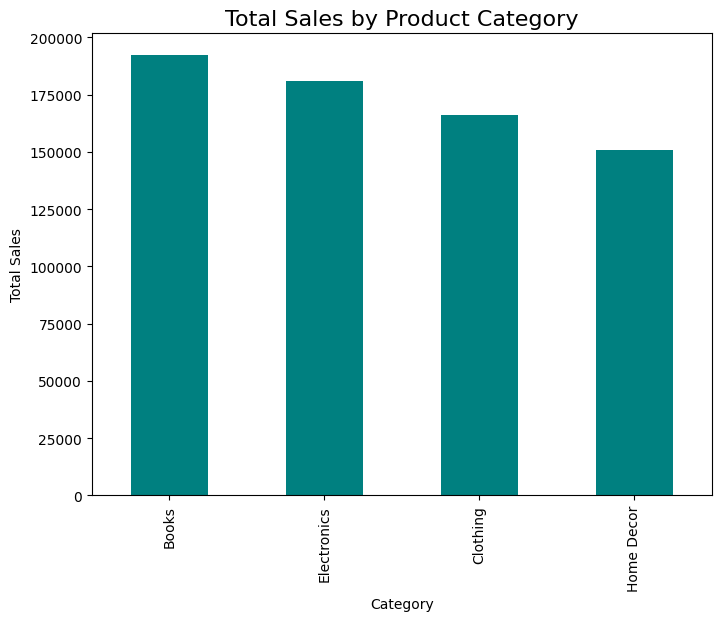

In [46]:
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

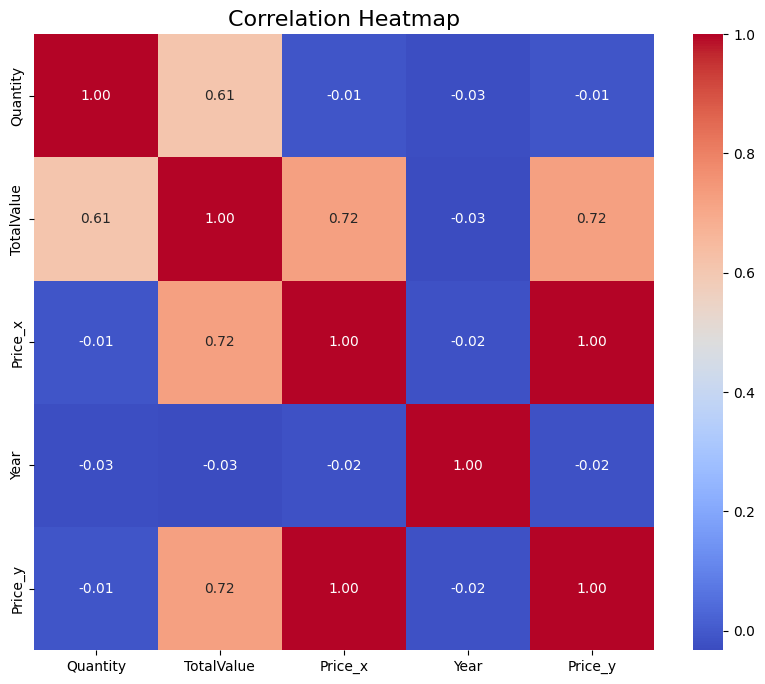

In [47]:
numeric_columns = merged_df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

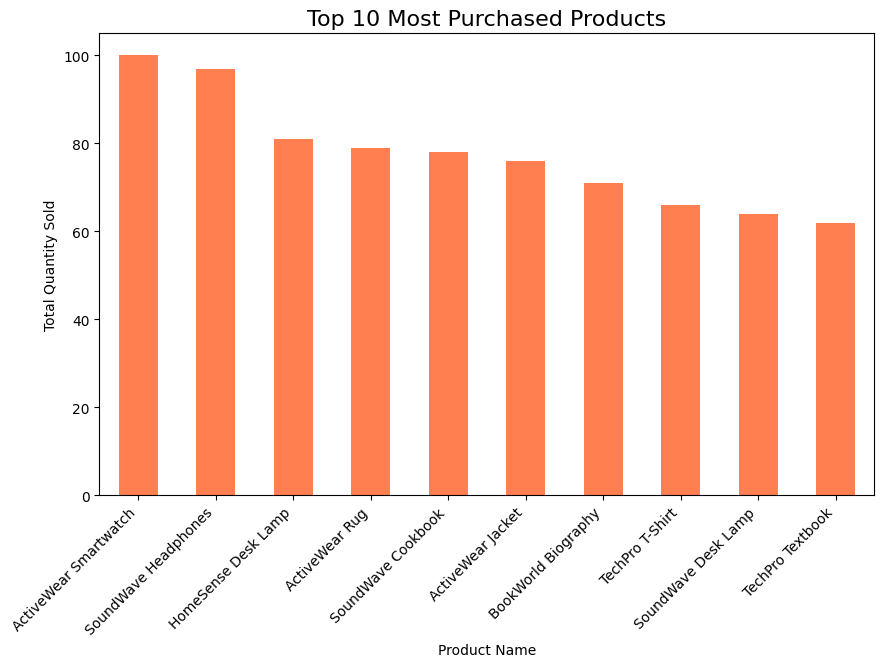

In [48]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='coral')
plt.title('Top 10 Most Purchased Products', fontsize=16)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

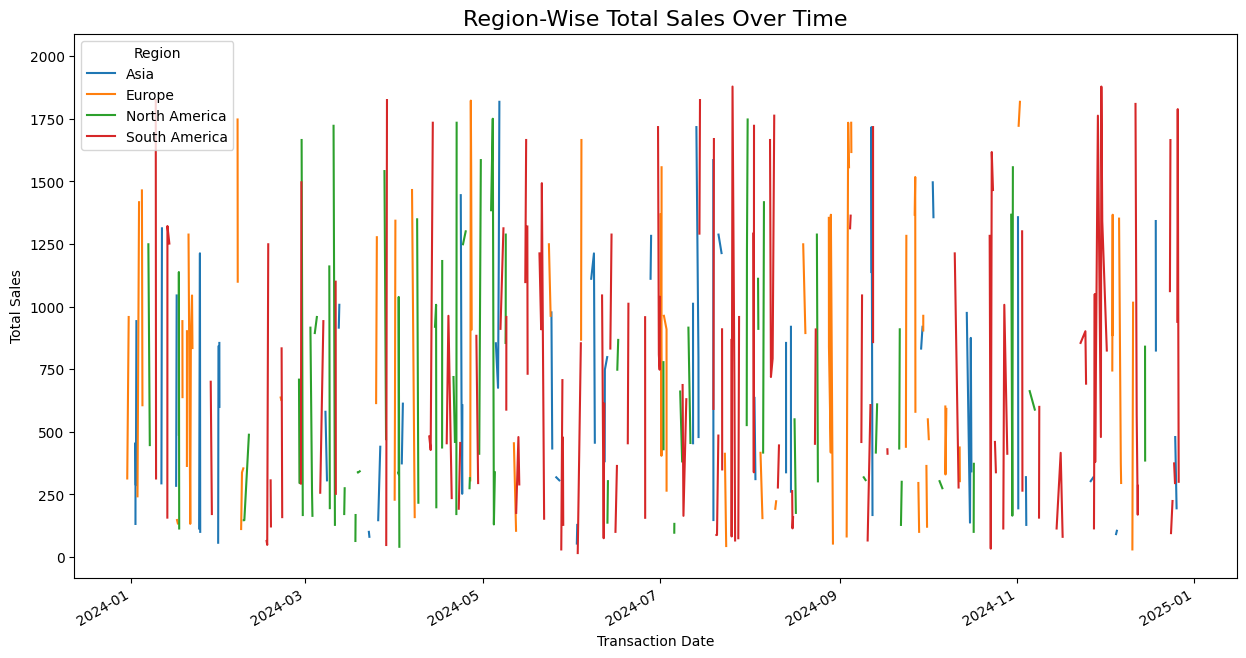

In [49]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
region_sales_time = merged_df.groupby(['TransactionDate', 'Region'])['TotalValue'].sum().unstack()
region_sales_time.plot(figsize=(15, 8))
plt.title('Region-Wise Total Sales Over Time', fontsize=16)
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.show()

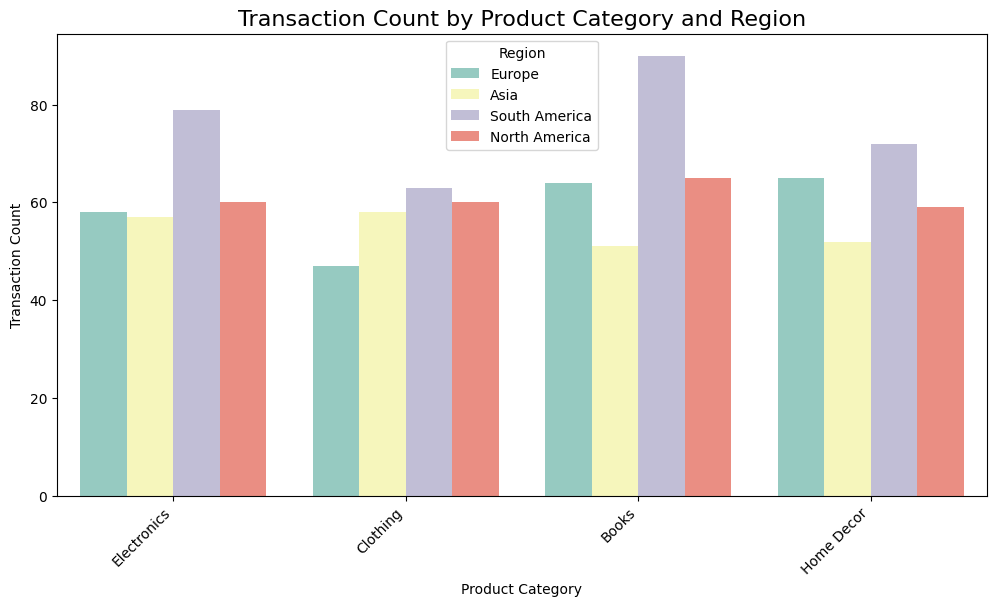

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Category', hue='Region', palette='Set3')
plt.title('Transaction Count by Product Category and Region', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.show()


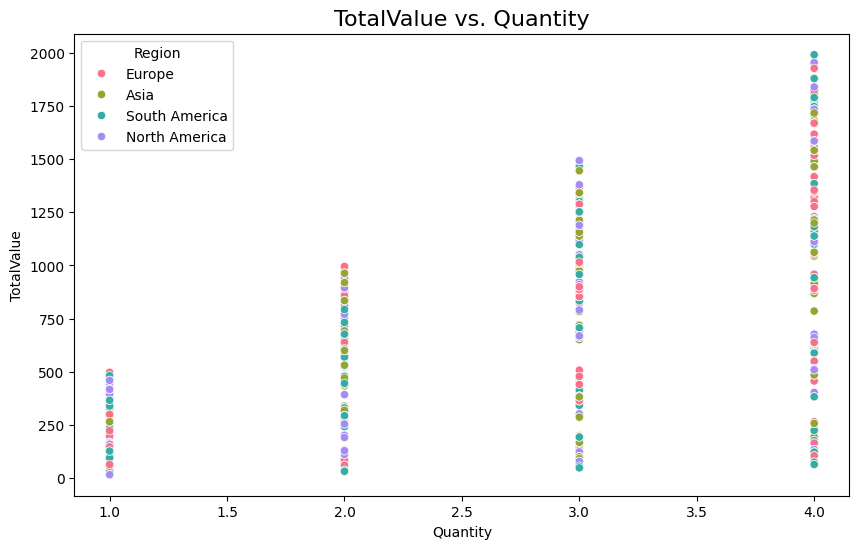

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Quantity', y='TotalValue', hue='Region', palette='husl')
plt.title('TotalValue vs. Quantity', fontsize=16)
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.legend(title='Region')
plt.show()


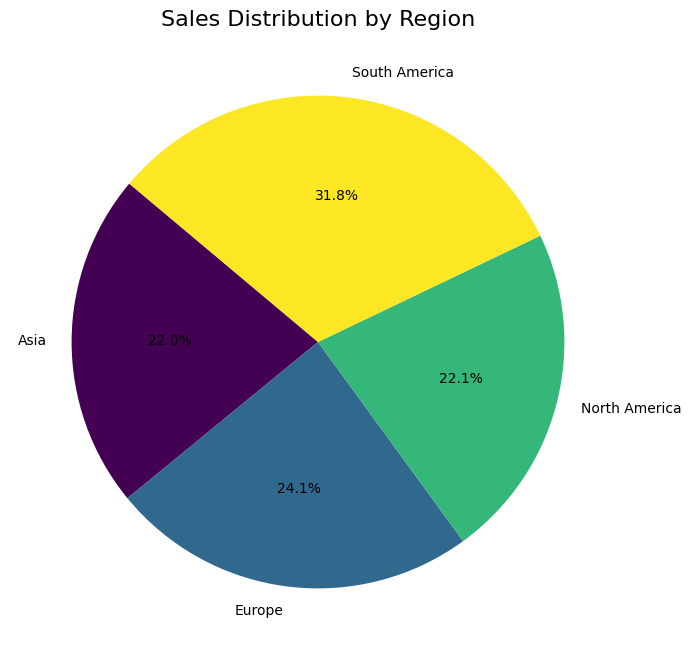

In [53]:
region_sales = merged_df.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')
plt.show()